In [6]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from scipy.stats import chi2_contingency
import seaborn as sns

In [2]:
# read the CSV file with the dataset
dataset_df = pd.read_csv('dataset', low_memory=False)
dataset_df.keys()

Index(['Unnamed: 0', 'der_ordinal_v1a', 'der_days_fu', 'der_deadbinary',
       'der_dead30', 'der_mv', 'der_ICU', 'der_hosp', 'der_AKI_comp',
       'der_MOF_comp', 'der_coinfection_any', 'der_sepsis_comp',
       'der_bleeding_comp', 'der_rem', 'der_hcq', 'der_steroids_c19',
       'der_other_tx_c19_v2', 'der_o2_ever', 'der_race_v2', 'der_insurance',
       'der_smoking2', 'der_obesity', 'der_card', 'der_pulm', 'der_renal',
       'der_dm2', 'der_ecogcat2', 'der_breast_biomarkers',
       'der_cancer_status_v4', 'der_cancer_tx_timing_v2', 'der_cancertr_none',
       'der_any_cyto', 'der_any_targeted', 'der_her2_3m', 'der_cdk46i_3m',
       'der_other_3m', 'der_any_endo', 'der_any_immuno', 'der_any_local',
       'der_any_other', 'der_region_v2', 'urban_rural', 'der_site_type',
       'severity_of_covid_19_v2', 'der_tr_intent', 'der_txline', 'der_heme',
       'der_metastatic', 'der_met_bone', 'der_met_liver', 'der_met_lung_v2',
       'der_age_trunc', 'der_CV_event_v2', 'der_pulm_eve

In [3]:
# Cleaning the dataset
# Narrow down the dataset to view region and severity of Covid
residence_df = dataset_df[['der_region_v2', 'urban_rural', 'der_site_type', 'severity_of_covid_19_v2', 'der_cancer_status_v4']]

# Clean the dataset to remove any NAN fields
nonNaN_residence_df = residence_df.dropna()

# Remove any non-US and other data
US_residence_df = nonNaN_residence_df.loc[(nonNaN_residence_df['der_region_v2'] != 'Non-US') | (nonNaN_residence_df['der_region_v2'] != 'Other')]

# Remove unknown residence 
US_residence_df_clean = US_residence_df.loc[(US_residence_df['urban_rural'] != 'Unknown') | (US_residence_df['der_region_v2'] != 'Other')]

# Display a sample of the clean dataset 
US_residence_df_clean.sample(10)


,der_region_v2,urban_rural,der_site_type,severity_of_covid_19_v2,der_cancer_status_v4
407,Midwest,Urban,Academic Medical Center,Mild,"Remission or no evidence of disease, <5 years"
947,West,Urban,Tertiary Care Center,Mild,"Remission or no evidence of disease, >5 years"
269,Northeast,Suburban,Tertiary Care Center,Mild,Active and progressing
332,Northeast,Urban,Tertiary Care Center,Mild,"Remission or no evidence of disease, <5 years"
445,Midwest,Rural,Tertiary Care Center,Mild,Active and responding
1249,Northeast,Suburban,Tertiary Care Center,Mild,Active and responding
1317,Northeast,Urban,Community Practice,Mild,Active and stable
900,West,Suburban,Community Practice,Mild,"Remission or no evidence of disease, >5 years"
895,West,Suburban,Community Practice,Mild,Active and stable
3,Northeast,Suburban,Community Practice,Moderate,Unknown


## How many Breast-Cancer patients that were diagnosed with Covid-19 lived in urban, suburban, and rural area?

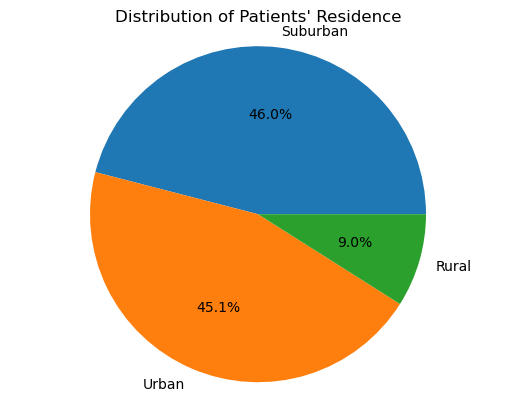

In [12]:
# Create a pie chart for the patients living in urban, suburban, and rural
residence_counts = US_residence_df_clean['urban_rural'].value_counts()
plt.pie(residence_counts, labels=residence_counts.index, autopct='%1.1f%%')
plt.axis('equal')
plt.title("Distribution of Patients' Residence")
plt.show()

In [14]:
# Statistical Analysis 
# Create the df with analysis 

# urban_stats = pd.DataFrame(US_residence_df_clean[US_residence_df_clean['urban_rural'] == 'Urban']['severity_of_covid_19_v2']).value_counts()
# suburban_stats = pd.DataFrame(US_residence_df_clean[US_residence_df_clean['urban_rural'] == 'Suburban']['severity_of_covid_19_v2']).value_counts()
# rural_stats = pd.DataFrame(US_residence_df_clean[US_residence_df_clean['urban_rural'] == 'Rural']['severity_of_covid_19_v2']).value_counts()

# statistical_df = pd.DataFrame(
#     {
#     'urban': urban_stats,
#     'suburban': suburban_stats,
#     'rural': rural_stats
# }
# )
# print(statistical_df)

residence_counts_df = pd.DataFrame(US_residence_df_clean['urban_rural'].value_counts())
residence_counts_df

# data = {'urban_rural': ['Suburban', 'Urban', 'Rural'],
#         'count': [502, 492, 98]}

# df = pd.DataFrame(data)

# # Print the original DataFrame
# print("Original DataFrame:")
# print(df)

# # Perform Chi-Square test
# chi2, p, dof, expected = chi2_contingency(pd.crosstab(df['urban_rural'], df['count']))

# # Print the results
# print("\nChi-Square Statistic:", chi2)
# print("P-value:", p)
# print("Degrees of Freedom:", dof)
# print("\nExpected Frequencies Table:")
# print(pd.DataFrame(expected, columns=df['urban_rural'].unique(), index=['count']))


,count
urban_rural,
Suburban,502
Urban,492
Rural,98


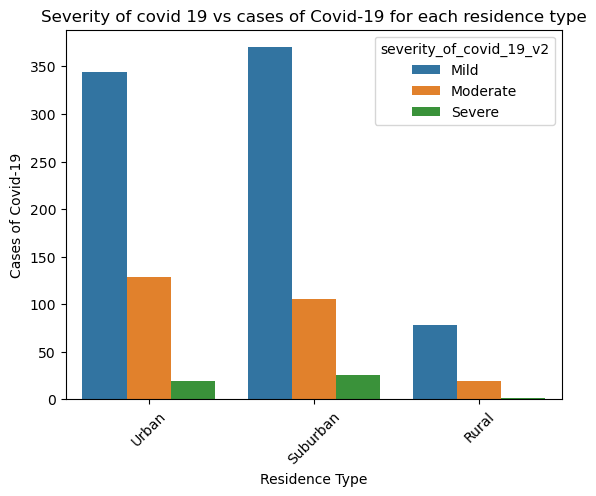

In [9]:
# Severity of Covid vs the type of residence

barplot = sns.countplot(US_residence_df_clean, x = 'urban_rural', hue = 'severity_of_covid_19_v2')

plt.title("Severity of covid 19 vs cases of Covid-19 for each residence type")
plt.xlabel("Residence Type")
plt.ylabel("Cases of Covid-19")
plt.xticks(rotation=45)
plt.show()


In [8]:
# Statistical Analysis 
# Create the df with analysis 

urban_stats = pd.DataFrame(US_residence_df_clean[US_residence_df_clean['urban_rural'] == 'Urban']['severity_of_covid_19_v2']).value_counts()
suburban_stats = pd.DataFrame(US_residence_df_clean[US_residence_df_clean['urban_rural'] == 'Suburban']['severity_of_covid_19_v2']).value_counts()
rural_stats = pd.DataFrame(US_residence_df_clean[US_residence_df_clean['urban_rural'] == 'Rural']['severity_of_covid_19_v2']).value_counts()

statistical_df = pd.DataFrame(
    {
    'urban': urban_stats,
    'suburban': suburban_stats,
    'rural': rural_stats
}
)
print(statistical_df)

# Perform Chi-Square test
chi2, p, dof, expected = chi2_contingency(statistical_df)

# Print the results
print("\nChi-Square Statistic:", chi2)
print("P-value:", p)
print("Degrees of Freedom:", dof)


                         urban  suburban  rural
severity_of_covid_19_v2                        
Mild                       344       370     78
Moderate                   129       106     19
Severe                      19        26      1

Chi-Square Statistic: 8.336911424132218
P-value: 0.07998775089098689
Degrees of Freedom: 4
